In [1]:
import os
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datasets import load_dataset

plt.style.use("seaborn-v0_8-darkgrid")
plt.rcParams["figure.figsize"] = (8,5)
plt.rcParams["font.family"] = "DejaVu Sans"

#load summarize dataset
try:
    summ_data = load_dataset('csv', data_files="../data/raw/news.csv")
except Exception as e:
    print(f"An error occurred while loading the dataset: {e}")

#load sentiment dataset
try:
    sent_data = load_dataset('csv', data_files="../data/raw/data - data.csv")
except Exception as e:
    print(f"An error occurred while loading the dataset: {e}")



Generating train split: 0 examples [00:00, ? examples/s]

Generating train split: 0 examples [00:00, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['URL', 'Title', 'Summary', 'Contents', 'Date', 'Author(s)', 'Category', 'Tags'],
        num_rows: 313320
    })
})

Sample Content: K·∫øt qu·∫£ ƒëo√†n ki·ªÉm tra c·ªßa S·ªü Y t·∫ø TPHCM t·ª´ ng√†y 9 ƒë·∫øn 13.10, c√≥ 16 c∆° s·ªü¬† b·ªã ph·∫°t h√†nh ch√≠nh v·ªõi nhi·ªÅu sai ph·∫°m kh√°c nhau nh∆∞ v·ªÅ gi√°, kh√°m ch·ªØa b·ªánh kh√¥ng ph√©p.  C·ª• th·ªÉ, C√¥ng ty TNHH Ph√≤ng kh√°m ƒêa khoa Lians MMC (l·∫ßu 2 s·ªë 35 ƒë∆∞·ªùng N·ªôi khu H∆∞ng Ph∆∞·ªõc 4 ph∆∞·ªùng T√¢n Phong qu·∫≠n 7) b·ªã ph·∫°t 59,4 tri·ªáu ƒë·ªìng ...
Sample Summary: S·ªü Y t·∫ø TPHCM v·ª´a ti·∫øn h√†nh ki·ªÉm tra 16 c∆° s·ªü kh√°m ch·ªØa b·ªánh, nh√† thu·ªëc t∆∞ nh√¢n tr√™n ƒë·ªãa b√†n TPHCM v√† x·ª≠ ph·∫°t h√†nh ch√≠nh theo quy ƒë·ªãnh. Trong ƒë√≥, m·ªôt s·ªë ph√≤ng kh√°m c√≥ y·∫øu t·ªë n∆∞·ªõc ngo√†i b·ªã ph·∫°t n·∫∑ng.

Length stats (words):
       contents_len   summary_len
count  43909.000000  43909.000000
mean     504.773509     41.905509
std      373.844960 

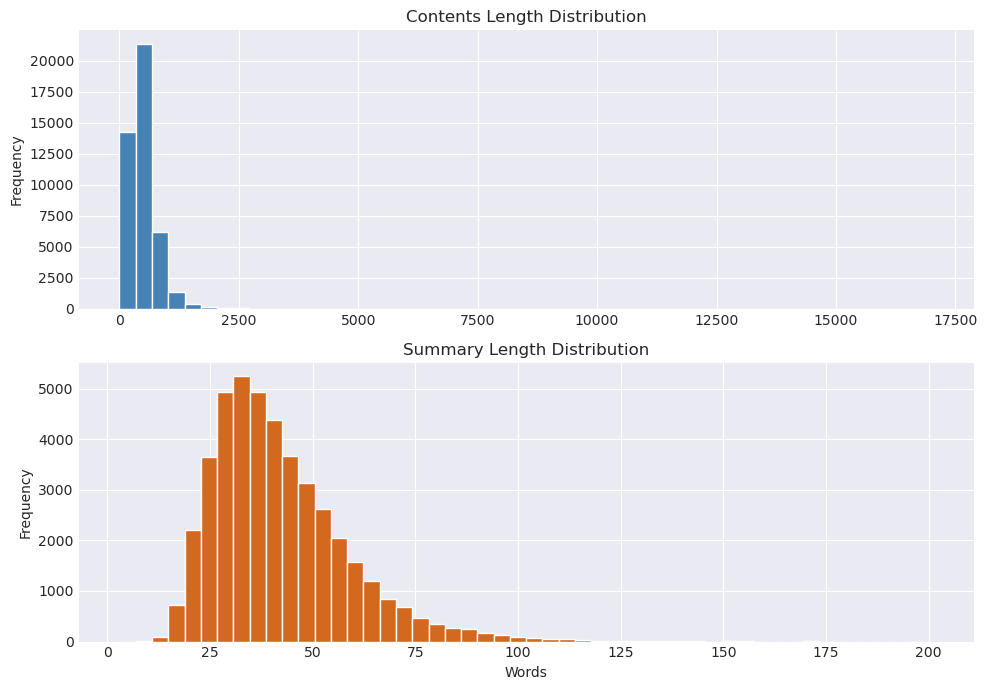

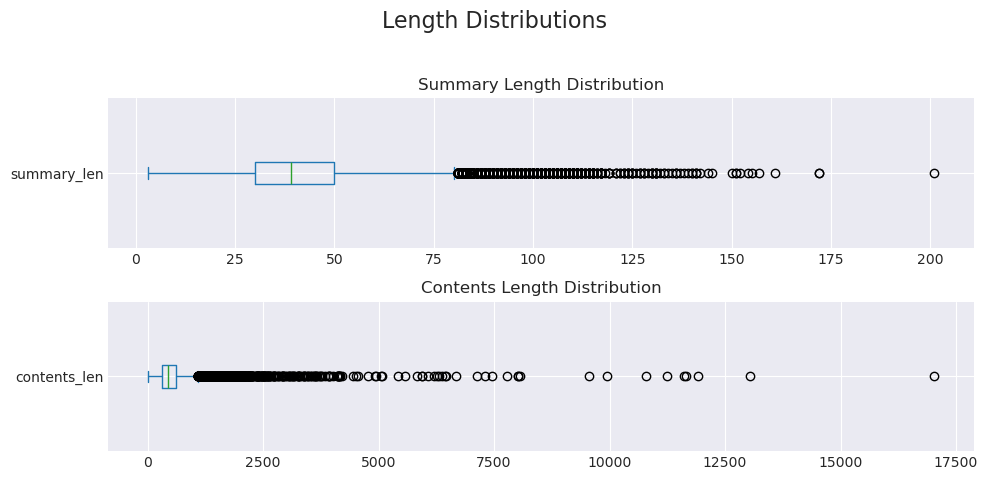

In [2]:
# inspect summarization dataset
if summ_data:
    print(summ_data)

    # take 1/7 of the datasets for faster EDA + fine tune with laptop gpu
    train_ds = summ_data["train"].shuffle(seed=42)
    sample_size = len(train_ds) // 7
    train_sample = train_ds.select(range(sample_size))

    # convert to df and remove na
    df_summ = pd.DataFrame(train_sample)
    df_summ = df_summ.dropna(subset=["Contents", "Summary"])

    sample = df_summ.iloc[0]
    print("\nSample Content:", sample["Contents"][:300], "...")
    print("Sample Summary:", sample["Summary"])

    #compute length
    df_summ["contents_len"] = df_summ["Contents"].astype(str).apply(lambda x: len(x.split()))
    df_summ["summary_len"] = df_summ["Summary"].astype(str).apply(lambda x: len(x.split()))

    print("\nLength stats (words):")
    print(df_summ[["contents_len", "summary_len"]].describe())

    # Histo
    # sharex=False allows each plot to have its own x-axis range
    fig, ax = plt.subplots(2, 1, figsize=(10, 7), sharex=False)
    # Plot 'Contents' histogram on the first subplot
    ax[0].hist(df_summ["contents_len"], bins=50, color='steelblue', label="Contents")
    ax[0].set_title("Contents Length Distribution")
    ax[0].set_ylabel("Frequency")
    # Plot 'Summaries' histogram on the second subplot
    ax[1].hist(df_summ["summary_len"], bins=50, color='chocolate', label="Summaries")
    ax[1].set_title("Summary Length Distribution")
    ax[1].set_xlabel("Words")
    ax[1].set_ylabel("Frequency")
    # Adjust layout
    plt.tight_layout()
    plt.show()

    # Create a figure and a set of subplots (2 rows, 1 column)
    fig, ax = plt.subplots(2, 1, figsize=(10, 5))
    # Plot 'summary_len' on the first subplot (ax[0])
    df_summ[["summary_len"]].plot(kind="box", vert=False, ax=ax[0])
    ax[0].set_title("Summary Length Distribution")
    # Plot 'contents_len' on the second subplot (ax[1])
    df_summ[["contents_len"]].plot(kind="box", vert=False, ax=ax[1])
    ax[1].set_title("Contents Length Distribution")
    # Add an overall title for the figure
    fig.suptitle("Length Distributions", fontsize=16)
    # Adjust layout to prevent titles/labels from overlapping
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


üí¨ Sentiment Dataset
DatasetDict({
    train: Dataset({
        features: ['comment', 'label', 'rate', 'Unnamed: 3'],
        num_rows: 31460
    })
})

Sample Text: Vai v√† tay √°o v√†o l·ªách n√™n b·ªã v·∫∑n.
Label: NEU


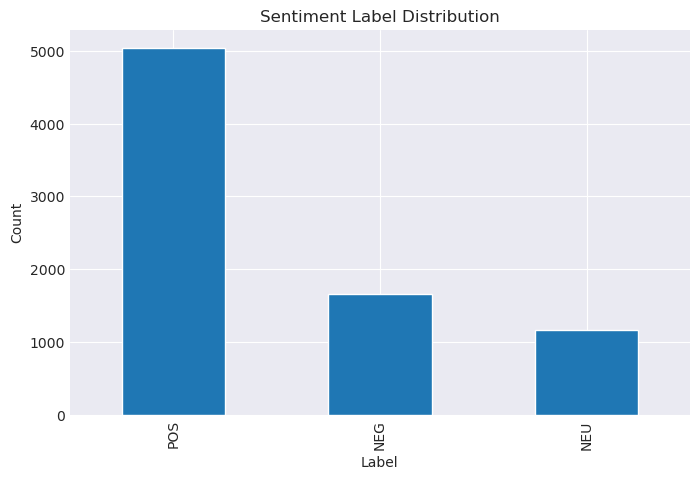

In [3]:
#Inspect sentiment dataset
if sent_data:
    print("\nüí¨ Sentiment Dataset")
    print(sent_data)

    #same as above but take 1/4 of the sentiment one
    train_ds = sent_data["train"].shuffle(seed=42)
    sample_size = len(train_ds) // 4
    train_sample = train_ds.select(range(sample_size))

    # convert to df and remove na
    df_sent = pd.DataFrame(train_sample)
    df_sent = df_sent.dropna(subset=["comment", "label"])

    # Show sample
    sample = df_sent.iloc[0]
    print("\nSample Text:", sample["comment"])
    print("Label:", sample["label"])

    #Label distribution
    df_sent["label"].value_counts().plot(kind="bar")
    plt.title("Sentiment Label Distribution")
    plt.xlabel("Label")
    plt.ylabel("Count")
    plt.show()